In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [2]:
from pathlib import Path
import requests

In [3]:
csvpath = Path("DE_nasdaqdata.csv")

In [4]:
df = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [5]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-06,$349.45,1924037,$352.50,$353.00,$344.26
2021-07-02,$352.50,1132353,$354.57,$355.91,$351.21
2021-07-01,$354.29,1467982,$355.66,$356.19,$351.92
2021-06-30,$352.71,1643594,$348.17,$353.39,$348.17
2021-06-29,$348.93,1213477,$350.80,$352.70,$348.09


In [6]:
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)
df['Open'] = df['Open'].str.replace('$', '').astype(float)
df['High'] = df['High'].str.replace('$', '').astype(float)
df['Low'] = df['Low'].str.replace('$', '').astype(float)

<ipython-input-6-0b04cfc5e4f7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)
<ipython-input-6-0b04cfc5e4f7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Open'] = df['Open'].str.replace('$', '').astype(float)
<ipython-input-6-0b04cfc5e4f7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['High'] = df['High'].str.replace('$', '').astype(float)
<ipython-input-6-0b04cfc5e4f7>:4: FutureWarning: The default value of regex will change from True to

In [7]:
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-06,349.45,1924037,352.50,353.00,344.26
2021-07-02,352.50,1132353,354.57,355.91,351.21
2021-07-01,354.29,1467982,355.66,356.19,351.92
2021-06-30,352.71,1643594,348.17,353.39,348.17
2021-06-29,348.93,1213477,350.80,352.70,348.09
...,...,...,...,...,...
2011-07-12,81.65,7586082,82.89,83.15,81.50
2011-07-11,83.49,4860818,84.96,85.20,83.02
2011-07-08,86.11,5410866,84.63,86.31,84.30


In [8]:
df.sort_index(ascending=True, inplace=True)
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2011-07-06,84.59,4069638,84.77,85.14,83.75
2011-07-07,86.44,6303237,85.45,87.12,85.31
2011-07-08,86.11,5410866,84.63,86.31,84.30
2011-07-11,83.49,4860818,84.96,85.20,83.02
2011-07-12,81.65,7586082,82.89,83.15,81.50
...,...,...,...,...,...
2021-06-29,348.93,1213477,350.80,352.70,348.09
2021-06-30,352.71,1643594,348.17,353.39,348.17
2021-07-01,354.29,1467982,355.66,356.19,351.92


In [9]:
df = df.reset_index()

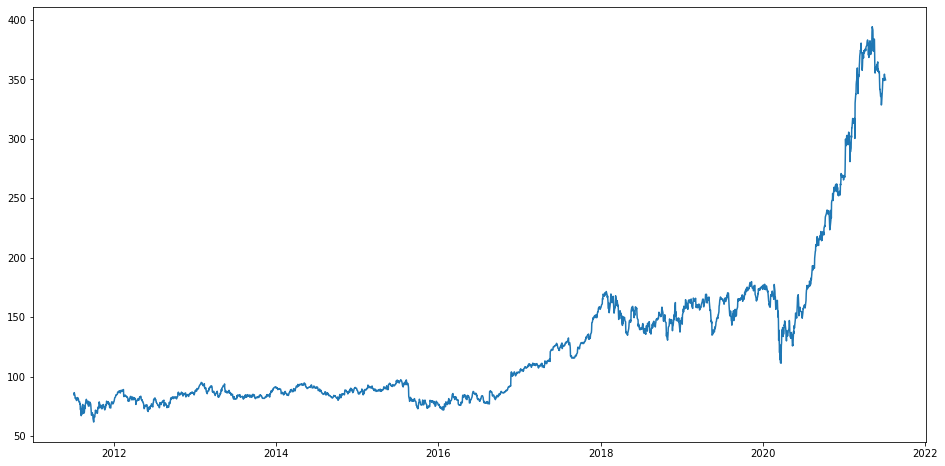

In [10]:
df['Date'] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close/Last"],label='Close Price history')

In [11]:
new_dataset = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close/Last'])

for i in range(0,len(df)):
    new_dataset["Date"][i] = df['Date'][i]
    new_dataset["Close/Last"][i] = df["Close/Last"][i]

In [12]:
new_dataset = new_dataset.set_index('Date')

In [13]:
new_dataset

,Close/Last
Date,
2011-07-06,84.59
2011-07-07,86.44
2011-07-08,86.11
2011-07-11,83.49
2011-07-12,81.65
...,...
2021-06-29,348.93
2021-06-30,352.71
2021-07-01,354.29


In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
final_dataset = new_dataset.to_numpy()

train_data = final_dataset[0:987,:]
valid_data = final_dataset[987:,:]


#new_dataset.drop(["Date"],axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data,y_train_data = [],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data = np.array(x_train_data),np.array(y_train_data)

x_train_data = np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [15]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [16]:
inputs_data = new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 3s - loss: 7.9815e-05


In [17]:
X_test = []
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test = np.array(X_test)

In [18]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

In [19]:
lstm_model.save("saved_model.h5")

In [20]:
train_data = new_dataset[:987]
valid_data = new_dataset[987:]

In [21]:
valid_data

,Close/Last
Date,
2015-06-09,91.85
2015-06-10,92.94
2015-06-11,93.21
2015-06-12,92.56
2015-06-15,92.46
...,...
2021-06-29,348.93
2021-06-30,352.71
2021-07-01,354.29


In [22]:
predicted_closing_price

array([[ 89.11453 ],
       [ 92.069534],
       [ 77.64554 ],
       [ 74.27721 ],
       [ 76.48463 ],
       [ 70.5602  ],
       [ 80.50023 ],
       [ 79.92515 ],
       [ 83.21126 ],
       [ 77.04152 ],
       [ 80.2002  ],
       [ 83.51657 ],
       [ 98.71184 ],
       [103.11899 ],
       [105.75898 ],
       [106.87583 ],
       [121.09058 ],
       [123.031235],
       [114.06508 ],
       [126.909676],
       [144.44362 ],
       [156.29718 ],
       [149.30089 ],
       [132.56442 ],
       [137.25632 ],
       [136.80402 ],
       [144.25775 ],
       [136.19824 ],
       [136.89249 ],
       [154.88817 ],
       [150.8412  ],
       [142.54866 ],
       [157.04228 ],
       [140.35304 ],
       [157.34154 ],
       [166.91876 ],
       [165.64848 ],
       [159.20747 ],
       [131.56871 ],
       [128.97685 ],
       [149.55849 ],
       [181.70157 ],
       [209.61316 ],
       [237.10088 ],
       [258.6845  ],
       [300.0251  ],
       [332.99994 ],
       [320.6

In [23]:
import datetime

In [24]:
# %Y-%m-%d

dates = pd.date_range("2021-07-07", periods=48, freq="D")
dates

DatetimeIndex(['2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-07-31', '2021-08-01', '2021-08-02', '2021-08-03',
               '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07',
               '2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13', '2021-08-14', '2021-08-15',
               '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
               '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23'],
              dtype='datetime64[ns]', freq='D')

In [25]:
predicted = pd.DataFrame(predicted_closing_price, index=dates)
predicted

,0
2021-07-07,89.114532
2021-07-08,92.069534
2021-07-09,77.645538
2021-07-10,74.277206
2021-07-11,76.484627
2021-07-12,70.560204
2021-07-13,80.500229
2021-07-14,79.925148
2021-07-15,83.211258
2021-07-16,77.041519


In [26]:
predicted.rename(columns={0: "Predictions"}, inplace=True)
predicted.head()

,Predictions
2021-07-07,89.114532
2021-07-08,92.069534
2021-07-09,77.645538
2021-07-10,74.277206
2021-07-11,76.484627


In [27]:
final_frames = [valid_data, predicted]

valid_data = pd.concat(final_frames, axis=0, join="outer")
valid_data

,Close/Last,Predictions
2015-06-09,91.85,NaN
2015-06-10,92.94,NaN
2015-06-11,93.21,NaN
2015-06-12,92.56,NaN
2015-06-15,92.46,NaN
...,...,...
2021-08-19,NaN,237.100876
2021-08-20,NaN,258.684509
2021-08-21,NaN,300.025085
2021-08-22,NaN,332.999939


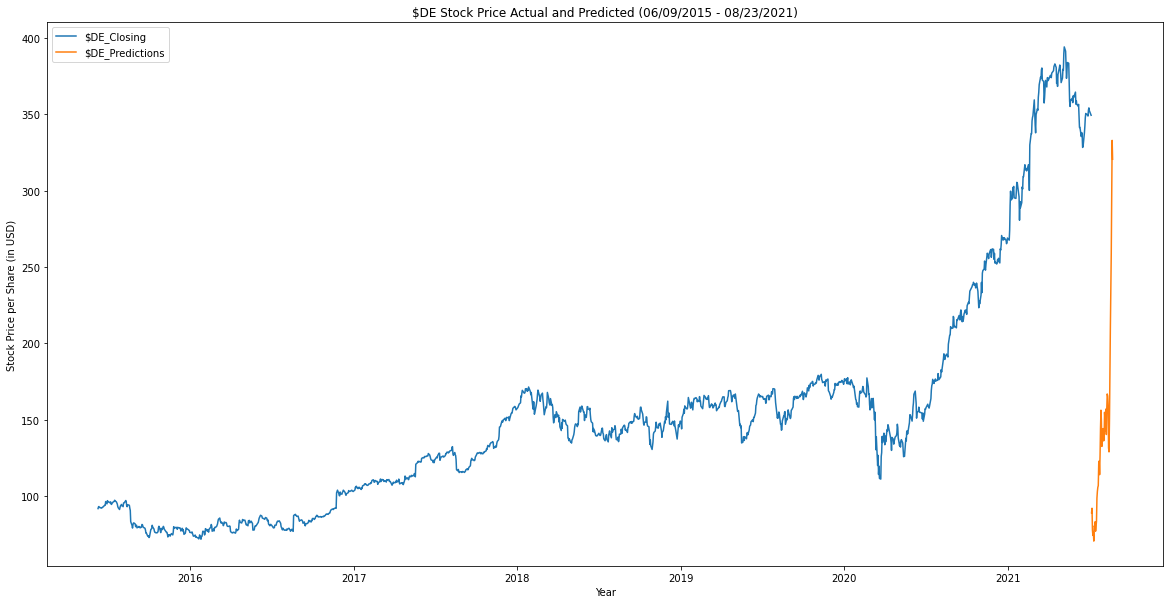

In [28]:
plt.plot(valid_data['Close/Last'], label="$DE_Closing")
plt.plot(valid_data['Predictions'], label="$DE_Predictions")
plt.title('$DE Stock Price Actual and Predicted (06/09/2015 - 08/23/2021)')
plt.xlabel('Year')
plt.ylabel('Stock Price per Share (in USD)')
plt.legend(loc="best")
plt.show()